In [4]:
import numpy as np
#0,2,6,7,9,14,15,16,17,18
list = []
list1 = []
with open('C:\RUTGERS\Analytics\BDdata_S1_prateek3.csv') as f:
    for line in f:
        ele = line.split(',')
        #list.append(line.split(','))
        list.append(np.delete(line.split(','), [0,1,9,11]).tolist())
        #list.append(np.delete(line.split(','), [0,1,2,5,10,12]).tolist())

"""
count = 0
print (list[0])
del list[0]
for ele in list:
    if float(ele[8]) == float(ele[9]):
        count = count+1
print (count)
"""
print (list[0])
print (list[1])
print (list[2])
print (list[25645])

['GENDER', 'AGE', 'MONTHJOINED', 'SOURCE', 'DEVICE', 'LTDURATION', ' DAY0CLV ', 'LTCLVbinary']
['F', '51.7', 'June', 'adwords', 'NULL', '127', '36.96', '1']
['F', '55', 'June', 'adwords', 'NULL', '123', '36.96', '1']
['F', '60.6', 'February', 'facebook', 'anphone', 'NULL', '37.19', '0']


In [5]:
del list[0]

In [6]:
class_train = []
for ele in list:
    if int(ele[7]) == 0:
        class_train.append(1)
    else:
        class_train.append(0)


from collections import Counter        
c = Counter(class_train)
print (c.most_common())

[(0, 25556), (1, 15874)]


In [7]:
gender = ['F','M','NULL']
MonthJoined = ['January','February','March','April','May','June','July','August','September','October', 'NULL']

source = ['facebook', 'NULL', 'HumanInteraction', 'bing', 'adwords', 'pinterest', 'retargeting', 'affiliate', 'google', 'youtube', 'thrivefacebook']
device = ['iphone', 'NULL', 'anphone', 'desktop']

final = []

for ele in list:
    gen = ele[0]
    mon = ele[2]
    sou = ele[3]
    dev = ele[4]
    if ele[1] == 'NULL':
        ele[1] = 0
    if ele[5] == 'NULL':
        ele[5] = 0
    if ele[6] == 'NULL':
        ele[6] = 0
    #final.append([gender.index(gen), float(ele[1]), MonthJoined.index(mon), source.index(sou), device.index(dev), int(ele[5]), float(ele[6])])
    final.append([gender.index(gen), float(ele[1]), MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[6])])
    
print (list[0])
print (list[1])
print (final[0])
print (final[1])

['F', '51.7', 'June', 'adwords', 'NULL', '127', '36.96', '1']
['F', '55', 'June', 'adwords', 'NULL', '123', '36.96', '1']
[0, 51.7, 5, 4, 1, 36.96]
[0, 55.0, 5, 4, 1, 36.96]


In [8]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(final, class_train, test_size=0.2)

c = Counter(y_train)
print (c.most_common())

c = Counter(y_test)
print (c.most_common())


print (len(y_train))
print (len(y_test))

[(0, 20429), (1, 12715)]
[(0, 5127), (1, 3159)]
33144
8286


In [9]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.572531981656
             precision    recall  f1-score   support

       Once       0.66      0.64      0.65      5127
   Multiple       0.44      0.46      0.45      3159

avg / total       0.58      0.57      0.57      8286

Confusion matrix, without normalization
[[3278 1849]
 [1693 1466]]


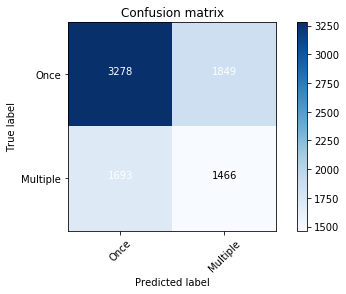

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

from sklearn.naive_bayes import BernoulliNB


class_names = ['Once','Multiple']
#print len(X_train)
#print len(y_train)

clf = BernoulliNB()
clf.fit(X_train, y_train)

pred = clf.predict(np.array(X_test))
proba = clf.predict_proba(np.array(X_test))

score = []
for ele in proba:
    score.append(ele[1])

from sklearn.metrics import accuracy_score
print ('Accuracy: '+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names=class_names))


cnf_matrix = confusion_matrix(y_test, pred)


%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

Accuracy: 0.567463190924
             precision    recall  f1-score   support

       Once       0.63      0.71      0.67      5127
   Multiple       0.42      0.33      0.37      3159

avg / total       0.55      0.57      0.56      8286

Confusion matrix, without normalization
[[3661 1466]
 [2118 1041]]


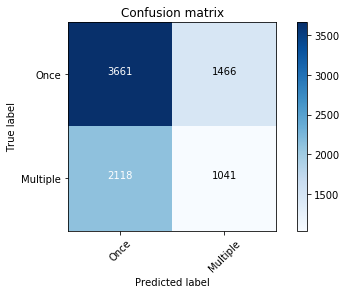

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=10)

clf2.fit(X_train, y_train)

pred2 = clf2.predict(np.array(X_test))
proba2 = clf2.predict_proba(np.array(X_test))

score2 = []
for ele in proba2:
    score2.append(ele[1])


print ('Accuracy: '+str(accuracy_score(y_test, pred2)))
print(classification_report(y_test, pred2, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred2)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

In [ ]:
from sklearn.svm import SVC

clf3 = SVC(probability=True)

clf3.fit(X_train, y_train)

pred3 = clf3.predict(np.array(X_test))
proba3 = clf3.predict_proba(np.array(X_test))

score3 = []
for ele in proba3:
    score3.append(ele[1])

print ('Accuracy: '+str(accuracy_score(y_test, pred3)))
print(classification_report(y_test, pred3, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred3)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, score)
plt.plot(fpr,tpr,color='b', alpha=0.2, label= 'Naive')

fpr2, tpr2, thresholds2 = roc_curve(y_test, score2)
plt.plot(fpr2,tpr2,color='r', alpha=0.2, label= 'RF')

fpr3, tpr3, thresholds3 = roc_curve(y_test, score3)
plt.plot(fpr3,tpr3,color='g', alpha=0.2, label= 'SVC')

plt.figure